In [157]:
import pandas as pd
import numpy as np

In [158]:
#data prep
products = pd.read_csv('../datasets/webmd.csv')
print(products.columns)

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')


/var/folders/1f/_b5l2mjj61sc5r2dq59dhwz80000gn/T/ipykernel_40932/689555808.py:2: DtypeWarning: Columns (0,1,2,3,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  products = pd.read_csv('../datasets/webmd.csv')


In [159]:
drugIds=np.unique(products['DrugId'])
print(drugIds[0:10])

[  9800.  12112.  75352.  93965. 144731. 146724. 149297. 154120. 163180.
 163405.]


In [160]:
relevant_cols=['Reviews','Satisfaction','DrugId']
products = products.loc[:, relevant_cols]

products.dropna(subset=['Reviews','Satisfaction','DrugId'], inplace=True)
products.reset_index(drop=True, inplace=True)

print(products.head())

                                             Reviews  Satisfaction    DrugId
0  I'm a retired physician and of all the meds I ...           5.0  146724.0
1  cleared me right up even with my throat hurtin...           5.0  146724.0
2  why did my PTINR go from a normal of 2.5 to ov...           3.0  144731.0
3                       FALLING AND DON'T REALISE IT           1.0  144731.0
4  My grandfather was prescribed this medication ...           1.0  144731.0


In [161]:
print(products['Reviews'][70])

This medication changed my life, I have always had heavy periods because of my thyroid condition but it was not just heavy bleeding but extreme Pain now the pain is manageable and even though it is now a longer period it is so much easier to handle Lysteda changed my life 


In [162]:
import string 
def remove_punctuation(text):
    try: # python 2.x
        text = text.translate(None, string.punctuation) 
    except: # python 3.x
        translator = text.maketrans('', '', string.punctuation)
        text = text.translate(translator)
    return text

products['Reviews'] = products['Reviews'].apply(remove_punctuation)
print(products['Reviews'])

0      Im a retired physician and of all the meds I h...
1      cleared me right up even with my throat hurtin...
2      why did my PTINR go from a normal of 25 to ove...
3                            FALLING AND DONT REALISE IT
4      My grandfather was prescribed this medication ...
                             ...                        
308                          pinched nerve in lower back
309    I had a friend who was diagnosed with Fibromya...
310    I had mild visual hallucinations after a week ...
311    had reaction spent week in hospital in semi co...
312                                                     
Name: Reviews, Length: 313, dtype: object


In [163]:
stop_words_list = open("../datasets/stopwords.txt","r")
stop_words_list = stop_words_list.readlines()
stop_words=[]
for word in stop_words_list:
    stop_words.append(word.split('\n')[0])
print(stop_words)

['x', 'y', 'your', 'yours', 'yourself', 'yourselves', 'you', 'yond', 'yonder', 'yon', 'ye', 'yet', 'z', 'zillion', 'j', 'u', 'umpteen', 'usually', 'us', 'username', 'uponed', 'upons', 'uponing', 'upon', 'ups', 'upping', 'upped', 'up', 'unto', 'until', 'unless', 'unlike', 'unliker', 'unlikest', 'under', 'underneath', 'use', 'used', 'usedest', 'r', 'rath', 'rather', 'rathest', 'rathe', 're', 'relate', 'related', 'relatively', 'regarding', 'really', 'res', 'respecting', 'respectively', 'q', 'quite', 'que', 'qua', 'n', 'neither', 'neaths', 'neath', 'nethe', 'nethermost', 'necessary', 'necessariest', 'necessarier', 'never', 'nevertheless', 'nigh', 'nighest', 'nigher', 'nine', 'noone', 'nobody', 'nobodies', 'nowhere', 'nowheres', 'no', 'noes', 'nor', 'nos', 'no-one', 'none', 'not', 'notwithstanding', 'nothings', 'nothing', 'nathless', 'natheless', 't', 'ten', 'tills', 'till', 'tilled', 'tilling', 'to', 'towards', 'toward', 'towardest', 'towarder', 'together', 'too', 'thy', 'thyself', 'thus',

In [164]:
feature_encoding='tfidf_word_count_' # tfidf_word_count_ or word_count_
balance_labels=False # True or False
analyzer='word'       # ‘word’, ‘char’, ‘char_wb’
ngram_range=(1, 1)    # unigram - (1,1), unigram & bigram - (1,2), bigram - (2,2)
stop_words='english' # stop_words or 'english'

In [165]:
# Word Importance: Frequency counts
from sklearn.feature_extraction.text import CountVectorizer

#analyzer='word'       # ‘word’, ‘char’, ‘char_wb’
#ngram_range=(2, 2)    # unigram - (1,1), unigram & bigram - (1,2), bigram - (2,2)
#stop_words=stop_words # stop_words or 'english'

'''
count_vect = CountVectorizer(analyzer=analyzer, ngram_range=ngram_range, stop_words=stop_words)
X_train_counts = count_vect.fit_transform(products['Reviews'])

wc_feature_names = np.array(count_vect.get_feature_names_out())
print('wc_feature_names: {}'.format(wc_feature_names))

word_count_df = pd.DataFrame(X_train_counts.toarray())
word_count_df = word_count_df.add_prefix('word_count_')

products = pd.concat([products, word_count_df], axis=1)
print(products.head())
'''

"\ncount_vect = CountVectorizer(analyzer=analyzer, ngram_range=ngram_range, stop_words=stop_words)\nX_train_counts = count_vect.fit_transform(products['Reviews'])\n\nwc_feature_names = np.array(count_vect.get_feature_names_out())\nprint('wc_feature_names: {}'.format(wc_feature_names))\n\nword_count_df = pd.DataFrame(X_train_counts.toarray())\nword_count_df = word_count_df.add_prefix('word_count_')\n\nproducts = pd.concat([products, word_count_df], axis=1)\nprint(products.head())\n"

In [166]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


tfidf_transformer = TfidfTransformer()
count_vect = CountVectorizer(analyzer=analyzer, ngram_range=ngram_range, stop_words=stop_words)

X_train_counts = count_vect.fit_transform(products['Reviews'])
wc_feature_names = np.array(count_vect.get_feature_names_out())
print('wc_feature_names: {}'.format(wc_feature_names))

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
word_count_df = pd.DataFrame(X_train_tfidf.toarray())
word_count_df = word_count_df.add_prefix('tf_idf_word_count_')
products = pd.concat([products, word_count_df], axis=1)
print(products.head())

wc_feature_names: ['10' '100' '1000' ... 'zinc' 'zingers' 'zombie']
                                             Reviews  Satisfaction    DrugId  \
0  Im a retired physician and of all the meds I h...           5.0  146724.0   
1  cleared me right up even with my throat hurtin...           5.0  146724.0   
2  why did my PTINR go from a normal of 25 to ove...           3.0  144731.0   
3                        FALLING AND DONT REALISE IT           1.0  144731.0   
4  My grandfather was prescribed this medication ...           1.0  144731.0   

   tf_idf_word_count_0  tf_idf_word_count_1  tf_idf_word_count_2  \
0                  0.0             0.000000                  0.0   
1                  0.0             0.000000                  0.0   
2                  0.0             0.483076                  0.0   
3                  0.0             0.000000                  0.0   
4                  0.0             0.000000                  0.0   

   tf_idf_word_count_3  tf_idf_word_count_

In [167]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

#analyzer='word'       # ‘word’, ‘char’, ‘char_wb’
#ngram_range=(2, 2)    # unigram - (1,1), unigram & bigram - (1,2), bigram - (2,2)
#stop_words=stop_words # stop_words or 'english'
tfidf = TfidfVectorizer(analyzer=analyzer, ngram_range=ngram_range, stop_words=stop_words)

X_train_tfidf = tfidf.fit_transform(products['Reviews'])
tfidf_df = pd.DataFrame(X_train_tfidf.toarray())
tfidf_df = word_count_df.add_prefix('tfidf_word_count_')
tfidf_feature_names = np.array(tfidf.get_feature_names_out())
print('tfidf_feature_names: {}'.format(tfidf_feature_names))

products = pd.concat([products, tfidf_df], axis=1)
print(products.head())

tfidf_feature_names: ['10' '100' '1000' ... 'zinc' 'zingers' 'zombie']
                                             Reviews  Satisfaction    DrugId  \
0  Im a retired physician and of all the meds I h...           5.0  146724.0   
1  cleared me right up even with my throat hurtin...           5.0  146724.0   
2  why did my PTINR go from a normal of 25 to ove...           3.0  144731.0   
3                        FALLING AND DONT REALISE IT           1.0  144731.0   
4  My grandfather was prescribed this medication ...           1.0  144731.0   

   tf_idf_word_count_0  tf_idf_word_count_1  tf_idf_word_count_2  \
0                  0.0             0.000000                  0.0   
1                  0.0             0.000000                  0.0   
2                  0.0             0.483076                  0.0   
3                  0.0             0.000000                  0.0   
4                  0.0             0.000000                  0.0   

   tf_idf_word_count_3  tf_idf_word_cou

In [168]:
new_doc = products['Reviews'][:2].to_numpy()
responses = tfidf.transform(new_doc)

In [169]:
def get_top_tf_idf_words(response, feature_names, top_n=3):
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_names[response.indices[sorted_nzs]]

In [170]:
top_n=10
new_doc = products['Reviews'][:top_n].to_numpy()
review_sample = tfidf.transform(new_doc)
review_top_words = get_top_tf_idf_words(review_sample, wc_feature_names, top_n=top_n)

In [171]:
print(review_top_words)

['realise' 'falling' 'age' 'spray' 'operation' 'ptinr' 'heart' 'condition'
 '100' 'hurting']


In [172]:
#extracting sentiments
products = products[products['Satisfaction'] != 3]
products.reset_index(drop=True, inplace=True)
products.shape

(274, 4983)

In [173]:
products['sentiment'] = products['Satisfaction'].apply(lambda r: +1 if r > 3 else -1)
products.head()

,Reviews,Satisfaction,DrugId,tf_idf_word_count_0,tf_idf_word_count_1,tf_idf_word_count_2,tf_idf_word_count_3,tf_idf_word_count_4,tf_idf_word_count_5,tf_idf_word_count_6,...,tfidf_word_count_tf_idf_word_count_2481,tfidf_word_count_tf_idf_word_count_2482,tfidf_word_count_tf_idf_word_count_2483,tfidf_word_count_tf_idf_word_count_2484,tfidf_word_count_tf_idf_word_count_2485,tfidf_word_count_tf_idf_word_count_2486,tfidf_word_count_tf_idf_word_count_2487,tfidf_word_count_tf_idf_word_count_2488,tfidf_word_count_tf_idf_word_count_2489,sentiment
0,Im a retired physician and of all the meds I h...,5.0,146724.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,cleared me right up even with my throat hurtin...,5.0,146724.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,FALLING AND DONT REALISE IT,1.0,144731.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,My grandfather was prescribed this medication ...,1.0,144731.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,help heart condition operation well,4.0,144731.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


array([[<Axes: title={'center': 'sentiment'}>]], dtype=object)

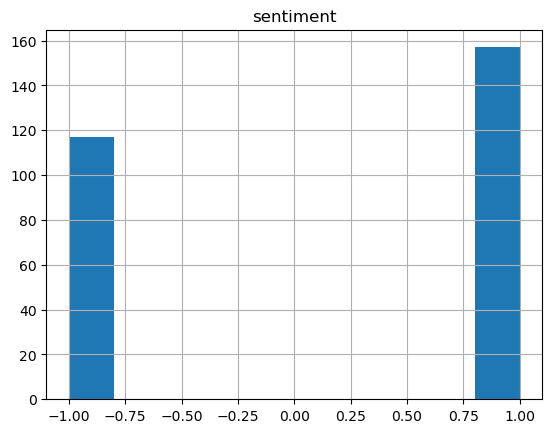

In [174]:
# View number of positive and negative sentiment
products.hist(column=['sentiment'])

In [175]:
if(balance_labels):
    # Report number of positive examples
    positive_sent = products[products['sentiment']==1]
    print('There are {} positive reviews'.format(len(positive_sent)))

    # Report number of negative examples
    negative_sent = products[products['sentiment']==-1]
    print('There are {} negative reviews'.format(len(negative_sent)))

    # Sample number of negative example from positive examples (# positive > # negative)
    positive_sample = positive_sent.sample(n = len(negative_sent))
    print('[Update] There are {} positive reviews'.format(len(positive_sample)))

    # Merge positive and negative examples and update products dataframe
    frames = [negative_sent, positive_sample]
    products = pd.concat(frames)

In [176]:
print(products.head())

                                             Reviews  Satisfaction    DrugId  \
0  Im a retired physician and of all the meds I h...           5.0  146724.0   
1  cleared me right up even with my throat hurtin...           5.0  146724.0   
2                        FALLING AND DONT REALISE IT           1.0  144731.0   
3  My grandfather was prescribed this medication ...           1.0  144731.0   
4                help heart condition operation well           4.0  144731.0   

   tf_idf_word_count_0  tf_idf_word_count_1  tf_idf_word_count_2  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   tf_idf_word_count_3  tf_idf_word_count_4  tf_idf_word_count_5  \
0                  0.0                  0.

In [177]:
print(products.tail())

                                               Reviews  Satisfaction   DrugId  \
269                        pinched nerve in lower back           4.0  93965.0   
270  I had a friend who was diagnosed with Fibromya...           1.0  93965.0   
271  I had mild visual hallucinations after a week ...           1.0  93965.0   
272  had reaction spent week in hospital in semi co...           1.0  93965.0   
273                                                              1.0  93965.0   

     tf_idf_word_count_0  tf_idf_word_count_1  tf_idf_word_count_2  \
269                  0.0                  0.0                  0.0   
270                  0.0                  0.0                  0.0   
271                  0.0                  0.0                  0.0   
272                  0.0                  0.0                  0.0   
273                  0.0                  0.0                  0.0   

     tf_idf_word_count_3  tf_idf_word_count_4  tf_idf_word_count_5  \
269                  0

In [178]:
# split dataset to train/test

from sklearn.model_selection import train_test_split

X, y = products.loc[:, ~products.columns.isin(['sentiment'])], products.loc[:, products.columns.isin(['sentiment'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [179]:
def predict_probability(X, W, b=0):
    # Take dot product of feature_matrix and coefficients  
    score = np.dot(X, W)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    y_pred = 1. / (1.+np.exp(-score)) + b    
    return y_pred

In [180]:
def compute_avg_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    logexp = np.log(1. + np.exp(-scores))
    
    # Simple check to prevent overflow
    mask = np.isinf(logexp)
    logexp[mask] = -scores[mask]
    
    lp = np.sum((indicator-1)*scores - logexp)/len(feature_matrix)
    
    return lp

In [181]:
# Helper function to update weights in gradient descent 
def update_weights(X, Y, W, b, learning_rate, log_likelihood):      
    # no_of_training_examples, no_of_features         
    num_features, num_examples = X.shape
    # Make a prediction
    y_pred = 1 / (1 + np.exp(-(X.dot(W) + b))) 
    
    dW = X.T.dot(Y-y_pred) / num_features 
    db = np.sum(Y-y_pred) / num_features 

    # update weights and bias
    b = b + learning_rate * db
    W = W + learning_rate * dW

    # Compute log-likelihood
    for i in range(len(W)):
        #y_pred = 1 / (1 + np.exp(-(X[:,i].dot(W[i]) + b))) 
        #log_likelihood += compute_avg_log_likelihood(X[:,i], Y, W[i])
        log_likelihood = compute_avg_log_likelihood(X[:,i], Y, W[i])

    return W, b, log_likelihood

In [182]:
def predict(X, W, b):
    Z = 1 / (1 + np.exp(- (X.dot(W) + b)))
    Y = [-1 if z <= 0.5 else +1 for z in Z]
    return Y

def fit(X, Y, num_iterations, learning_rate):   
    # no_of_training_examples, no_of_features         
    num_features, num_examples = X.shape    
    
    # weight initialization         
    W = np.zeros(num_examples)
    b = 0
    log_likelihood=0
    likelihood_history=[]
      
    # gradient ascent learning 
    for i in range(num_iterations):          
        W, b, log_likelihood = update_weights(X, Y, W, b, learning_rate, log_likelihood)   
        likelihood_history.append(log_likelihood)
    return W, b, likelihood_history

In [183]:
# Word count
if(feature_encoding=='word_count_'):
    X_train_sentiment = X_train.loc[:,X_train.columns.str.startswith('word_count_')]
    X_test_sentiment = X_test.loc[:,X_test.columns.str.startswith('word_count_')]

# TF-IDF
if(feature_encoding=='tfidf_word_count_'):
    X_train_sentiment = X_train.loc[:,X_train.columns.str.startswith('tfidf_word_count_')]
    X_test_sentiment = X_test.loc[:,X_test.columns.str.startswith('tfidf_word_count_')]
X_train_sentiment.head()

,tfidf_word_count_tf_idf_word_count_0,tfidf_word_count_tf_idf_word_count_1,tfidf_word_count_tf_idf_word_count_2,tfidf_word_count_tf_idf_word_count_3,tfidf_word_count_tf_idf_word_count_4,tfidf_word_count_tf_idf_word_count_5,tfidf_word_count_tf_idf_word_count_6,tfidf_word_count_tf_idf_word_count_7,tfidf_word_count_tf_idf_word_count_8,tfidf_word_count_tf_idf_word_count_9,...,tfidf_word_count_tf_idf_word_count_2480,tfidf_word_count_tf_idf_word_count_2481,tfidf_word_count_tf_idf_word_count_2482,tfidf_word_count_tf_idf_word_count_2483,tfidf_word_count_tf_idf_word_count_2484,tfidf_word_count_tf_idf_word_count_2485,tfidf_word_count_tf_idf_word_count_2486,tfidf_word_count_tf_idf_word_count_2487,tfidf_word_count_tf_idf_word_count_2488,tfidf_word_count_tf_idf_word_count_2489
67,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.222552,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
88,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
28,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.229093,0.0,0.0,0.0,0.0,0.0
16,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
185,0.236767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [184]:
# Hyper-parameters
learning_rate=0.0001
num_iterations=100

sentiment_model_weights, sentiment_model_bias, likelihood_history = fit(X_train_sentiment.to_numpy(), np.ravel(y_train), num_iterations, learning_rate)

In [185]:
review_idx=10
sentiment = predict(X_test_sentiment[:review_idx], sentiment_model_weights, sentiment_model_bias)
sentiment = ['positive' if i==1 else 'negative' for i in sentiment]
sentiment

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative']

In [186]:
sentiment = predict(X_test_sentiment[:2], sentiment_model_weights, sentiment_model_bias)
sentiment

[-1, -1]

In [187]:
print(products['Reviews'][:2])
print(products['sentiment'][:2])

0    Im a retired physician and of all the meds I h...
1    cleared me right up even with my throat hurtin...
Name: Reviews, dtype: object
0    1
1    1
Name: sentiment, dtype: int64


In [188]:
print(sentiment_model_weights)
print(sentiment_model_bias)

[ 1.93852482e-05 -2.95502144e-05  0.00000000e+00 ...  0.00000000e+00
  5.59121922e-06 -1.50182582e-05]
-0.003477257926952448


In [189]:
num_positive_weights = np.sum(sentiment_model_weights >= 0)
num_negative_weights = np.sum(sentiment_model_weights < 0)

print("Number of positive weights: %s " % num_positive_weights)
print("Number of negative weights: %s " % num_negative_weights)

Number of positive weights: 1610 
Number of negative weights: 880 


In [190]:
# Accuracy

def get_classification_accuracy(prediction_labels, true_labels):    
    # Compute the number of correctly classified examples
    num_correct = np.sum(prediction_labels == true_labels)

    # Then compute accuracy by dividing num_correct by total number of examples
    accuracy = num_correct / len(true_labels)
    return accuracy

In [191]:
accuracy = get_classification_accuracy(predict(X_train_sentiment.to_numpy(), sentiment_model_weights, sentiment_model_bias), 
                                       np.ravel(y_train))
print(accuracy)

0.42408376963350786


In [192]:
accuracy = get_classification_accuracy(predict(X_test_sentiment.to_numpy(), sentiment_model_weights, sentiment_model_bias), 
                                       np.ravel(y_test))
print(accuracy)

0.43373493975903615


In [193]:
len(likelihood_history)

100

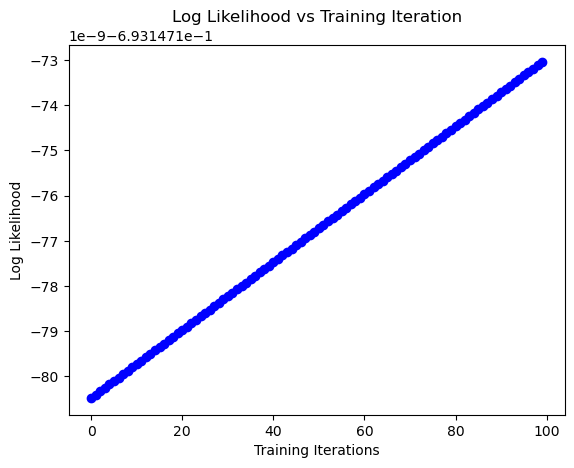

In [194]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(0,len(likelihood_history),1), likelihood_history, color = 'blue') 
plt.title('Log Likelihood vs Training Iteration') 
plt.xlabel('Training Iterations') 
plt.ylabel('Log Likelihood') 
plt.show() 

In [195]:
# effect of the learning rate

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_series(data, x_title, y_title, para1, para2, legend_label='iteration '):
    colors = mcolors.TABLEAU_COLORS

    # Sort colors by hue, saturation, value and name.
    names = sorted(
        colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    # Plot cost of training iterations
    j=0    
    for i in range(para1,len(data),para2):
        plt.plot(np.arange(0,len(data[i]),1), data[i], color = names[j], label=legend_label+str(i))
        if(j>=len(names)-1):
            j=0
        else:
            j+=1
    plt.title(y_title+' vs '+x_title+' Iteration') 
    plt.xlabel(x_title) 
    plt.ylabel(y_title) 
    plt.legend()
    plt.show() 

In [196]:
# Hyper-parameters
learning_rate=0.00001
num_iterations=100

In [197]:
weights_list=[]
likelihood_history = []
for lr in range(1,50,1):
    learning_rate=lr/100000
    weights, bias, log_lik = fit(X_train_sentiment.to_numpy(), np.ravel(y_train), num_iterations, learning_rate)
    likelihood_history.append(log_lik)

In [198]:
len(likelihood_history[0])

100

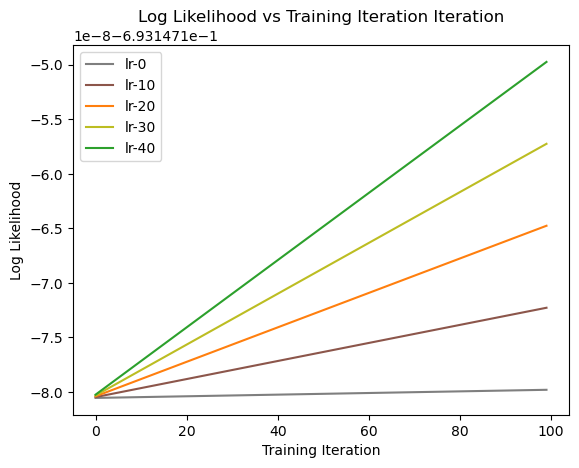

In [199]:
plot_series(likelihood_history, 'Training Iteration', 'Log Likelihood', 0, 10, legend_label='lr-')

In [200]:
# most positive or negative review

# Calculate the class probabilities for the test set
y_prob = predict_probability(X_test_sentiment.to_numpy(), sentiment_model_weights, b=sentiment_model_bias)

# Sort the test set in descending order of their probabilities of being positive
idx = np.argsort(-y_prob)

# Get the indices of the 20 most positive reviews
idx_most_positive = idx[-20:] 
print(idx_most_positive)

# Get the corresponding reviews from the test set
most_positive_reviews = X_test.iloc[idx_most_positive]
print(most_positive_reviews)

[20 29 55  5 57 36 50 45 10 76 71 28 77 62 78 52 72 12 63 21]
                                               Reviews  Satisfaction  \
174  My mom swears by it for her Neuropathy She say...           1.0   
238  The pain from my peripheral neuropathy was so ...           5.0   
214  Worked well at first then side effects began B...           1.0   
18   I have been on this pill for a little over two...           1.0   
259  Its given me the most relief from neck and spi...           4.0   
139  I took it for the first time today and ended u...           1.0   
93   i thought this was the miracle drug for me i h...           1.0   
189  SIDE EFFECTS 45lb wt gain in 5 months dangerou...           1.0   
73   I have very heavy menstrual cycles on days 2 a...           5.0   
192  I am 50 yrs old and have suffered from lower b...           5.0   
48   45 and diagnoses with a thicker than usual end...           2.0   
217  Dr started me on Lyrica for pain from Shingles...           5.0   
27

In [201]:
# Get the indices of the 20 most negative reviews
idx_most_negative = idx[:20]

# Get the corresponding reviews from the test set
most_negative_reviews = X_test.iloc[idx_most_negative]
print(most_negative_reviews)

                                               Reviews  Satisfaction  \
79   I have been taking Lysteda for 9 months and it...           5.0   
34                                                               4.0   
273                                                              1.0   
266                                                              5.0   
27                                                               1.0   
122  I have terrible periods where I miss 34 days o...           1.0   
183  stupid medicine in worldif you take this medic...           1.0   
112  low hgb for the first 8 months but not as tire...           5.0   
157  Very effective in reducing the amount of bleed...           5.0   
62   pill works very well but on the third day the ...           5.0   
264  I have been on some many meds in my life I got...           5.0   
239  The Lyrica has opened up my fuzzy brain  Its l...           5.0   
116  I am 50 years old I have had heavy periods my ...          

In [202]:
accuracy = get_classification_accuracy(predict(X_test_sentiment.to_numpy(), sentiment_model_weights, sentiment_model_bias), 
                                       np.ravel(y_test))
print(accuracy)

0.43373493975903615


In [203]:
num_positive = int(np.sum(y_train == +1))
num_negative = int(np.sum(y_train == -1))
print(num_positive)
print(num_negative)

110
81


/Users/divyamadala/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/var/folders/1f/_b5l2mjj61sc5r2dq59dhwz80000gn/T/ipykernel_40932/56368080.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num_positive = int(np.sum(y_train == +1))
/var/folders/1f/_b5l2mjj61sc5r2dq59dhwz80000gn/T/ipykernel_40932/56368080.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num_negative = int(np.sum(y_train == -1))


In [204]:
if num_positive >= num_negative:
    y_pred = 1
else:
    y_pred = -1

n_correct = np.sum(y_test == y_pred)
accuracy = n_correct / len(X_test)
print(accuracy)

sentiment    0.566265
dtype: float64


In [205]:
from sklearn.metrics import confusion_matrix

# Create model using sklearn
from sklearn.linear_model import LogisticRegression
num_iterations=100
sentiment_model = LogisticRegression(random_state=0, max_iter=num_iterations, tol=1e-3)
sentiment_model.fit(X_train_sentiment.to_numpy(), np.ravel(y_train))

sentiment_predictions = sentiment_model.predict(X_test_sentiment.loc[:, X_test_sentiment.columns.str.startswith('tfidf_word_count_')])
cmatrix = confusion_matrix(y_test, sentiment_predictions)
cmatrix

/Users/divyamadala/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[10, 26],
       [ 2, 45]])

In [206]:
true_neg, false_pos, false_neg, true_pos = cmatrix.ravel()
print('There are {} false positives'.format(false_pos))
print('There are {} false negatives'.format(false_neg))
print('There are {} true positives'.format(true_pos))
print('There are {} true negatives'.format(true_neg))

There are 26 false positives
There are 2 false negatives
There are 45 true positives
There are 10 true negatives


In [207]:
precision = true_pos/(true_pos+false_pos)
print("Precision on test data: %s" % precision)

false_pos / (true_pos + false_pos)

Precision on test data: 0.6338028169014085


0.36619718309859156

In [208]:
recall = true_pos / (true_pos + false_neg)
print("Recall on test data: %s" % recall)

true_pos / (true_pos + false_neg)

Recall on test data: 0.9574468085106383


0.9574468085106383

In [209]:
# make a list of all the attempts made to fix the data for better accuracy
# 1. cleaning up the data further: replacing emoticons and removing reviews starting with numbers
# 2. ROC curves
# 2. even out the number of reviews for each drug

